### Xử lý dữ liệu đầu vào cho các thuật toán ML
- Missing Data
    - Drop Nan
    - Gán giá trị bất kỳ
    - Gán giá trị mean-median
    - Gán giá trị ở cuối phân phối
    - Gán giá trị mẫu ngẫu nhiên
    - Gán giá trị hạng mục thường xuất hiện
    - Using KNN
- Encoding 
    - One-hot-encoding
    - Mã hóa mục tiêu (Hay)
    - Mã hóa tần số
    - Mã hóa số nguyên
- Outlier
    - Trimming data
    - Censoring/Capping
- Scale Data
    - Standardisation
    - MinMaxScaling
    - MaxAbsScaling
    - Mean normalisation

In [128]:
#Gọi các thư viên liên quan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,OrdinalEncoder,OneHotEncoder
import  feature_engine 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#Đọc data từ forder dataset
df = pd.read_csv('./dataset/houseprice.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df = df.drop('Id',axis = 1)

# Missing Data

In [4]:
X_train,X_test,y_train,y_test =  train_test_split(df.drop('SalePrice',axis = 1),df['SalePrice'],test_size=.3)

In [5]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 79), (438, 79), (1022,), (438,))

In [6]:
cca_cols = [var for var in X_train if X_train[var].isnull().mean() < 0.05]
cca_cols[:5]

['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape']

### Cách 1: Drop NaN

In [7]:
#Cách 1: drop các giá trị NaN:  
# Tùy nhiên nếu số lượng NaN trong dữ liệu quá nhiều có thể ảnh hưởng tới kq mô hình
# Các giả định nếu dữ liệu khuyết hoàn toán ngẫu nhiên MCAR nó sẽ hoạt động tốt
# Nếu dữ liệu bị khuyết thấp hơn 0.05 thì có thể drop nó
X_train[cca_cols].head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
711,50,C (all),8712,Pave,Reg,HLS,AllPub,Inside,Mod,IDOTRR,...,0,98,0,0,0,0,1,2010,WD,Abnorml
1414,50,RL,13053,Pave,Reg,Bnk,AllPub,Inside,Gtl,BrkSide,...,0,0,0,220,0,0,6,2008,WD,Normal
459,50,RL,7015,Pave,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,...,0,248,0,0,0,0,7,2009,WD,Normal
169,20,RL,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,Timber,...,64,0,0,0,0,0,1,2006,WD,Normal
1050,20,RL,8993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,22,0,0,0,0,0,8,2007,New,Partial


In [8]:
X_train_drop = X_train[cca_cols].dropna()
X_train_drop.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
711,50,C (all),8712,Pave,Reg,HLS,AllPub,Inside,Mod,IDOTRR,...,0,98,0,0,0,0,1,2010,WD,Abnorml
1414,50,RL,13053,Pave,Reg,Bnk,AllPub,Inside,Gtl,BrkSide,...,0,0,0,220,0,0,6,2008,WD,Normal
459,50,RL,7015,Pave,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,...,0,248,0,0,0,0,7,2009,WD,Normal
169,20,RL,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,Timber,...,64,0,0,0,0,0,1,2006,WD,Normal
1050,20,RL,8993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,22,0,0,0,0,0,8,2007,New,Partial


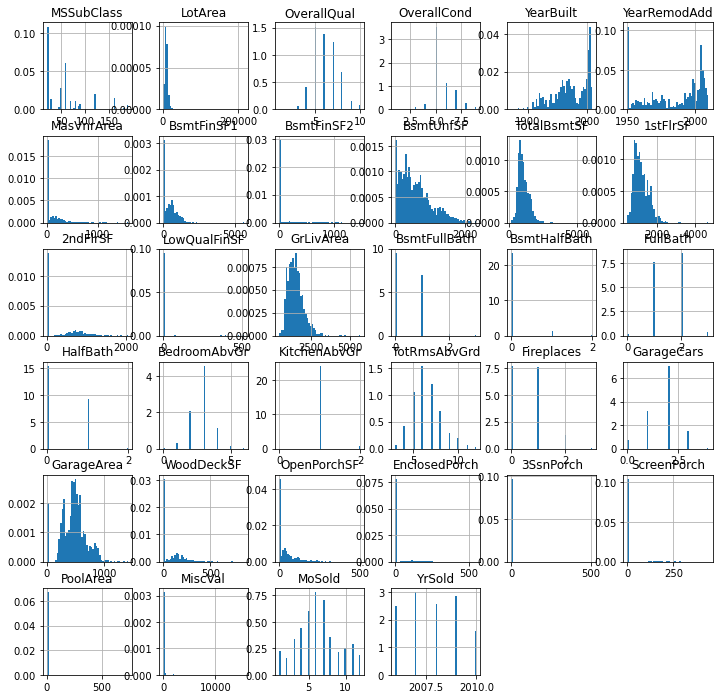

In [9]:
X_train_drop.hist(bins = 50,density=True, figsize=(12, 12))
plt.show()

In [10]:
def plot_hist_kde(df1,df2,variable):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df1[variable].plot(kind = 'kde',ax = ax,color = 'red')
    df2[variable].plot(kind = 'kde',ax = ax,color = 'blue')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df1[variable].plot(kind = 'hist',ax = ax,density = True)
    df2[variable].plot(kind = 'hist',ax = ax,alpha = .8,density  = True)

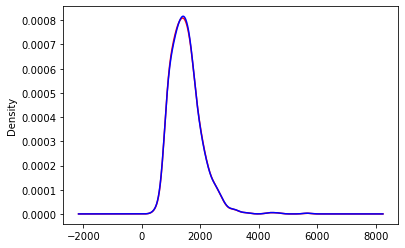

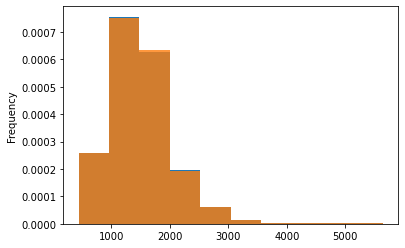

In [11]:
plot_hist_kde(X_train,X_train_drop,'GrLivArea')

### Cách 2: impute mean-median

In [12]:
#cách 2: gán giá trị trung bình  - trung vị
# Gán giá trị mean or median xấp xỉ nhau nếu như phân phối chuẩn
# Nếu phân phối lệch thì gán giá trị median
# Gỉa định nếu như dữ liệu khuyết hoàn toàn ngẫu nhiên MCAR
def impute_value(X,variable,value):
    return X[variable].fillna(value)
X_train,X_test,y_train,y_test =  train_test_split(df.drop('SalePrice',axis = 1),df['SalePrice'],test_size=.3)

In [13]:
means = np.mean(X_train[cca_cols],axis = 0)

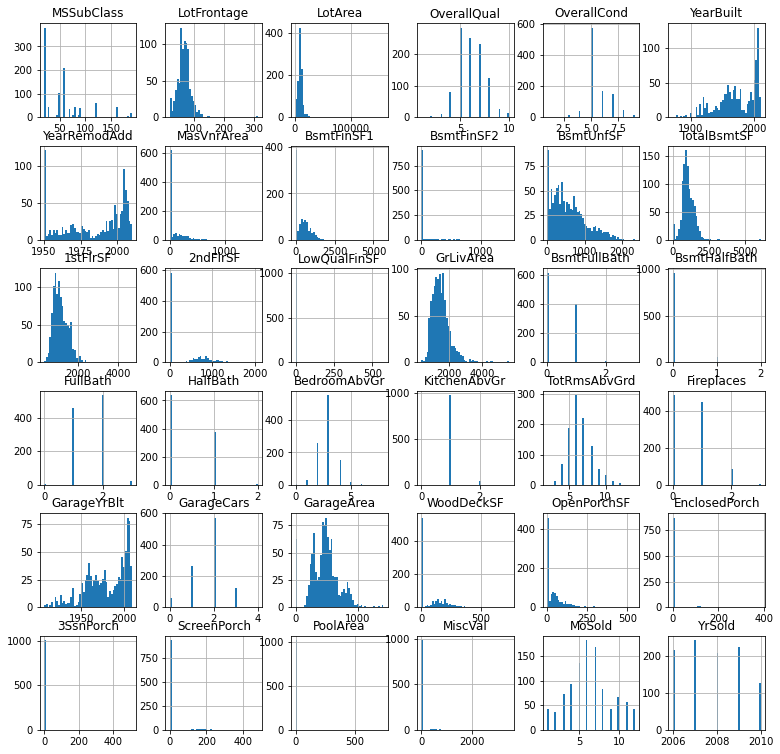

In [14]:
X_train.hist(bins = 50,figsize=(13,13))
plt.show()

In [15]:
cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
X_train_median = pd.DataFrame()
X_train_median = X_train[cols]
X_test_median = X_test[cols]
for col in cols:
    median = X_train.loc[:,col].median()
    X_train_median[col + '_median'] = impute_value(X_train_median,col,median)
    X_test_median[col + '_median'] = impute_value(X_test_median,col,median)

<ipython-input-15-95f01f448a18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_median[col + '_median'] = impute_value(X_train_median,col,median)
<ipython-input-15-95f01f448a18>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_median[col + '_median'] = impute_value(X_test_median,col,median)


In [16]:
X_train_median.isnull().sum()

LotFrontage           166
MasVnrArea              5
GarageYrBlt            62
LotFrontage_median      0
MasVnrArea_median       0
GarageYrBlt_median      0
dtype: int64

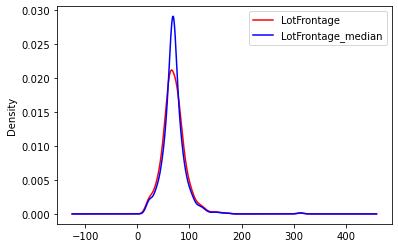

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind = 'kde',ax = ax,color = 'red')
X_train_median['LotFrontage_median'].plot(kind = 'kde',ax = ax,color = 'blue')
plt.legend()

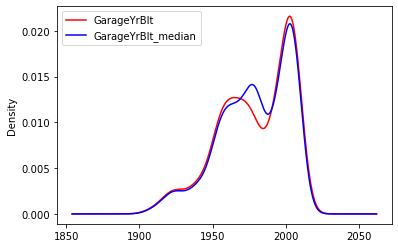

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['GarageYrBlt'].plot(kind = 'kde',ax = ax,color = 'red')
X_train_median['GarageYrBlt_median'].plot(kind = 'kde',ax = ax,color = 'blue')
plt.legend()

<AxesSubplot:>

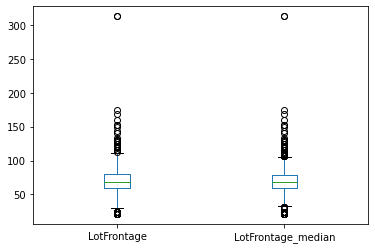

In [19]:
X_train_median[['LotFrontage', 'LotFrontage_median']].plot(kind = 'box')

#### Sử dụng thư viện gán mean-median

In [20]:
# Sử dụng thư viện gán giá trị mean-median
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [21]:
X_train,X_test,y_train,y_test =  train_test_split(df.drop('SalePrice',axis = 1),df['SalePrice'],test_size=.3)
cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [22]:
impute = SimpleImputer(strategy='mean').fit(X_train[cols])

In [23]:
impute.statistics_

array([  70.49174528,  107.93503937, 1978.06756757])

In [24]:
X_train = impute.transform(X_train[cols])
X_test = impute.transform(X_test[cols])

In [25]:
X_train_mean = pd.DataFrame(X_train,columns=cols)
X_train_mean

,LotFrontage,MasVnrArea,GarageYrBlt
0,49.000000,84.0,2007.0
1,70.491745,312.0,1969.0
2,80.000000,144.0,1971.0
3,70.491745,0.0,1962.0
4,69.000000,0.0,1997.0
...,...,...,...
1017,60.000000,0.0,2005.0
1018,72.000000,101.0,2003.0
1019,70.000000,116.0,1998.0
1020,65.000000,0.0,2004.0


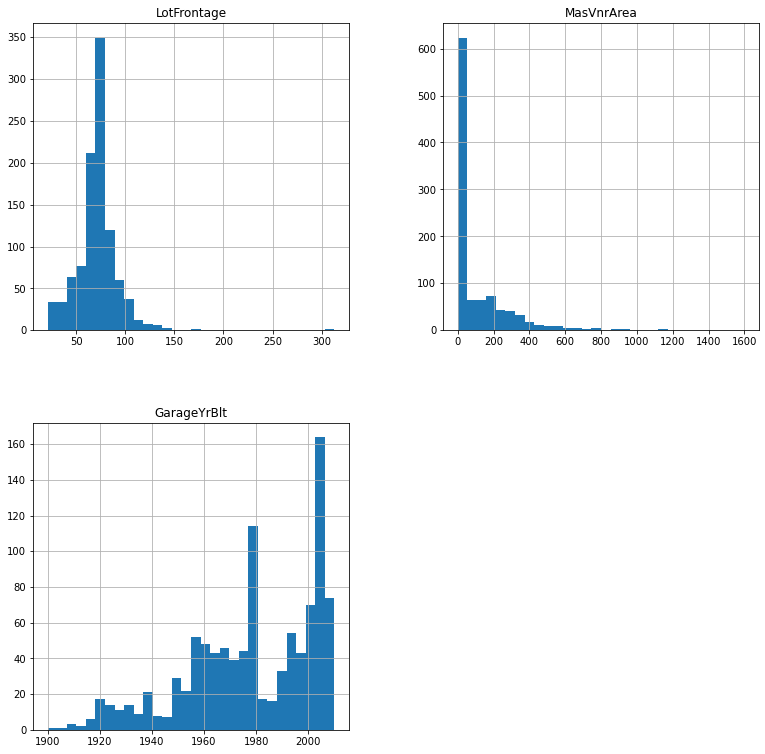

In [26]:
X_train_mean.hist(bins = 30,figsize=(13,13))
plt.show()

In [27]:
#Sử dụng thư viên nhưng thay đổi các giá trị gán khác nhau
impute_mean = ['LotFrontage']
impute_median = ['MasVnrArea','GarageYrBlt']
X_train,X_test,y_train,y_test =  train_test_split(df.drop('SalePrice',axis = 1),df['SalePrice'],test_size=.3)

In [28]:
processing = ColumnTransformer(transformers=[('mean_impute',SimpleImputer(strategy='mean'),impute_mean),
                               ('median_impute',SimpleImputer(strategy='median'),impute_median)],remainder='passthrough')

In [29]:
processing.fit(X_train[cols])

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_impute', SimpleImputer(),
                                 ['LotFrontage']),
                                ('median_impute',
                                 SimpleImputer(strategy='median'),
                                 ['MasVnrArea', 'GarageYrBlt'])])

In [30]:
processing.named_transformers_['mean_impute'].statistics_

array([70.2920143])

In [31]:
processing.named_transformers_['median_impute'].statistics_

array([   0., 1979.])

In [32]:
X_train_ColumsTransformer = processing.transform(X_train[cols])
X_test_ColumsTransformer = processing.transform(X_test[cols])

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>],
       [<AxesSubplot:title={'center':'GarageYrBlt'}>, <AxesSubplot:>]],
      dtype=object)

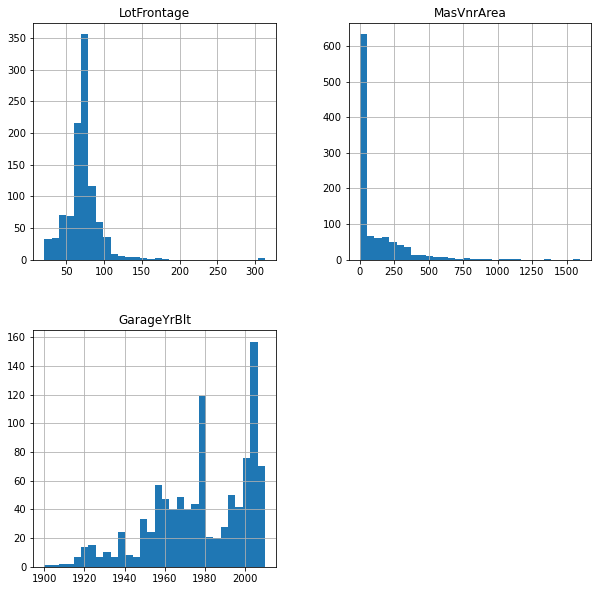

In [33]:
pd.DataFrame(X_train_ColumsTransformer,columns=cols).hist(bins = 30,figsize=(10,10))

In [34]:
# Cách 3: Gán giá trị ở cuối phân phối
#Gỉa định: Các dữ liệu không khuyết ngẫu nhiên
df = pd.read_csv('./dataset/titanic.csv',usecols=['age', 'fare', 'survived'])
df.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [35]:
df.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [36]:
value = df.age.mean() + 3 *df.age.std()
value

73.12163361219909

In [37]:
df['age_imputer'] = impute_value(df,'age',value)

<AxesSubplot:ylabel='Density'>

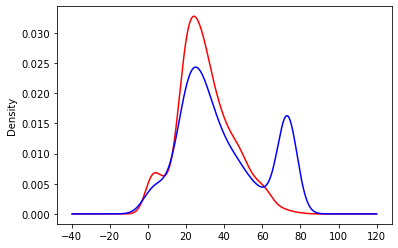

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind = 'kde',ax = ax,color = 'red')
df['age_imputer'].plot(kind = 'kde',ax = ax,color = 'blue')

### Cách 4: Gán giá trị bất kỳ

In [39]:
#cách 4: Gán giá trị bất kỳ
# Gỉa định dữ liệu không khuyết ngẫu nhiên
df = pd.read_csv('./dataset/titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [40]:
df.isnull().sum()

survived      0
age         263
fare          1
dtype: int64

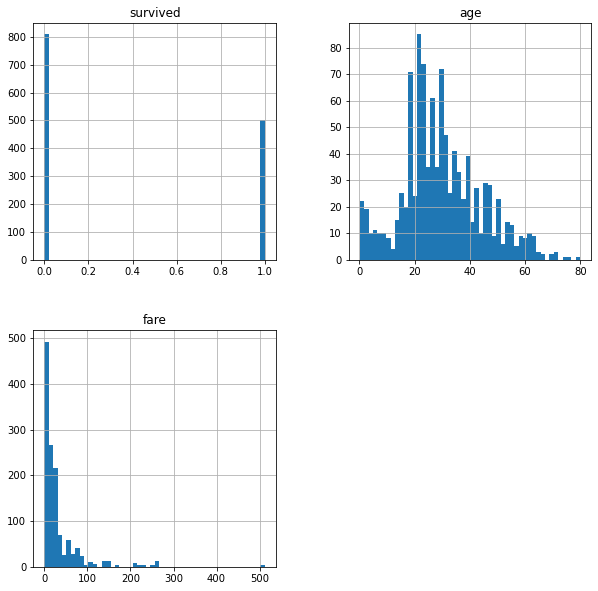

In [41]:
df.hist(bins = 50,figsize=(10,10))
plt.show()

In [42]:
df['age_imputer'] = impute_value(df,'age',85)
df['age_1'] = impute_value(df,'age',-1)
df['fare_imputer'] = impute_value(df,'fare',550)

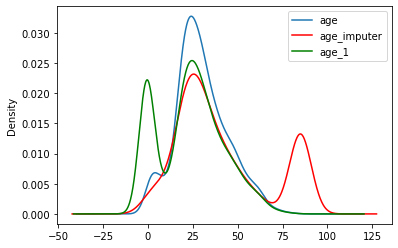

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['age'].plot(kind='kde', ax=ax)

df['age_imputer'].plot(kind='kde', ax=ax, color='red')

df['age_1'].plot(kind='kde', ax=ax, color='green')
plt.legend()

#### Sử dụng thư viện gán trị bất kỳ

In [44]:
df = pd.read_csv('./dataset/titanic.csv',usecols=['age','fare','survived'])
X_train, X_test, y_train, y_test = train_test_split(df[['fare','age']], # just the features
                                                    df['survived'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0)

In [45]:
imputer = SimpleImputer(strategy='constant', fill_value = 999).fit(X_train)

In [46]:
imputer.statistics_

array([999., 999.])

In [47]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [48]:
X_train = pd.DataFrame(X_train, columns=['fare','age'])
X_train.head()

,fare,age
0,19.5000,13.0
1,23.0000,4.0
2,13.8583,30.0
3,7.7250,999.0
4,7.7250,22.0


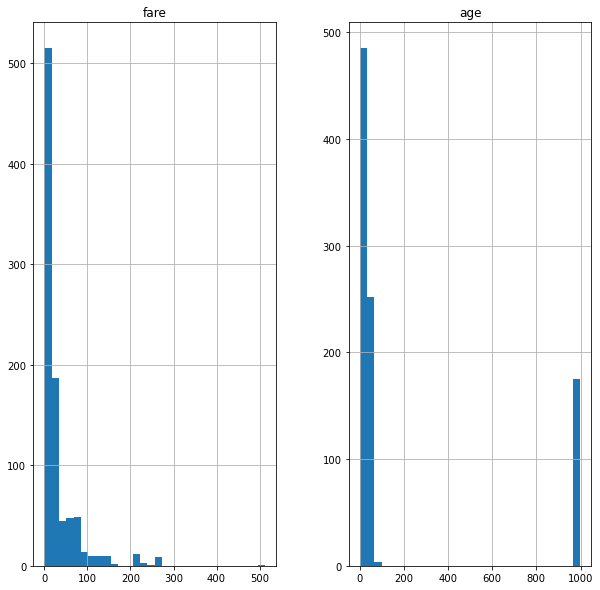

In [49]:
X_train.hist(bins=30, figsize=(10,10))
plt.show()

### Cách 5: Gán giá trị xuất hiện thường xuyên (hạng mục)

In [50]:
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('./dataset/houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [51]:
data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [52]:
mode_Bsmt = data.BsmtQual.mode()
mode_Bsmt

0    TA
dtype: object

In [53]:
mode_fire = data.FireplaceQu.mode()
mode_fire

0    Gd
dtype: object

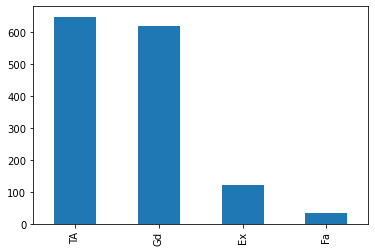

In [54]:
data['BsmtQual'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.show()

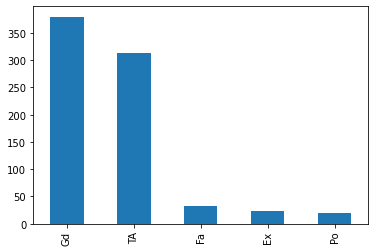

In [55]:
data['FireplaceQu'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.show()

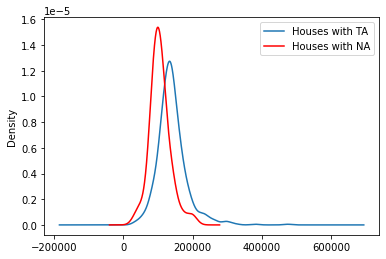

In [56]:
data[data['BsmtQual']=='TA']['SalePrice'].plot(kind = 'kde')
data[data['BsmtQual'].isnull()]['SalePrice'].plot(kind = 'kde',color = 'red')
labels = ['Houses with TA', 'Houses with NA']
plt.legend(labels)

In [57]:
data['BsmtQual'] = impute_value(data,'BsmtQual',mode_Bsmt)
data['FireplaceQu'] = impute_value(data,'FireplaceQu',mode_fire)

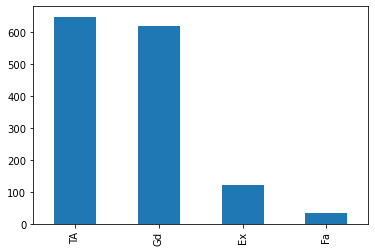

In [58]:
data['BsmtQual'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.show()

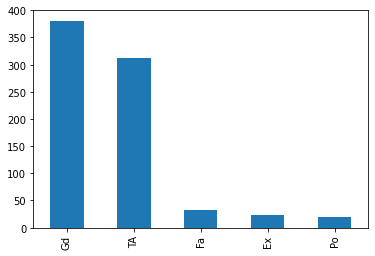

In [59]:
data['FireplaceQu'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.show()

### Cách 6: Gán mẫu ngẫu nhiên

In [60]:
data = pd.read_csv('./dataset/titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [61]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data.survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((916, 3), (393, 3))

In [62]:
X_train['Age_imputed'] = X_train['age'].copy()
X_test['Age_imputed'] = X_test['age'].copy()

<ipython-input-62-cd6aa6573159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_imputed'] = X_train['age'].copy()
<ipython-input-62-cd6aa6573159>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age_imputed'] = X_test['age'].copy()


In [63]:
random_sample_train = X_train['age'].dropna().sample(X_train['age'].isnull().sum(),random_state = 0)

In [64]:
random_sample_test = X_test['age'].dropna().sample(X_test['age'].isnull().sum(),random_state = 0)

In [65]:
random_sample_train.index = X_train[X_train['age'].isnull()].index
random_sample_test.index = X_test[X_test['age'].isnull()].index

In [66]:
X_train.loc[X_train['age'].isnull(), 'Age_imputed'] = random_sample_train
X_test.loc[X_test['age'].isnull() , 'Age_imputed'] = random_sample_test

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


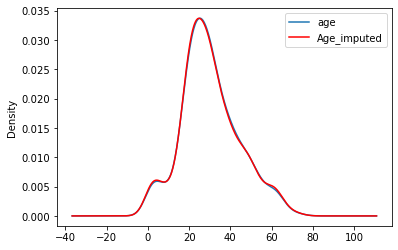

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['age'].plot(kind='kde', ax=ax)
X_train['Age_imputed'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Cách 7: Gán KNN

In [68]:
from sklearn.impute import KNNImputer

In [69]:
# list các biến dạng số

cols_to_use = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
    'WoodDeckSF',  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
    'SalePrice'
]
data = pd.read_csv('./dataset/houseprice.csv', usecols=cols_to_use)

# tìm các biến có giá trị bị khuyết
for var in data.columns:
    if data[var].isnull().sum() > 1:
        print(var, data[var].isnull().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [70]:
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [71]:
imputer = KNNImputer(
    n_neighbors=5, # số lượng neighbour K
    weights='distance', # hệ số trọng số
    metric='nan_euclidean', # phép đo tìm neighbour
    add_indicator=False, # thêm chỉ số dự báo 
)

In [72]:
imputer.fit(X_train,y_train)

KNNImputer(weights='distance')

In [73]:
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)
train_t = pd.DataFrame(train_t, columns=X_train.columns)

In [74]:
train_t[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

## Encoding

### Mã hóa one-hot
- Mã hóa one-hot k-1 biến nhị phân tính đến việc sử dụng ít hơn 1 thứ nguyên và vẫn biểu diễn được thông tin và tránh đưa dữ liệu dư thừa vào mô hình 
- Một số trường hợp tốt hơn nên mã hóa các biến thành k biến giả:
    - khi xây dựng các thuật toán cây
    - khi thực hiện lựa chọn đặc trưng bởi các thuật toán đệ quy
    - khi muốn xác định mức độ quan trọng của từng hạng mục riêng lẻ


In [75]:
from sklearn.preprocessing import OneHotEncoder

In [91]:
data = pd.read_csv('./dataset/titanic.csv',usecols=['sex','cabin','survived'])
data.head()

,survived,sex,cabin
0,1,female,B5
1,1,male,C22
2,0,female,C22
3,0,male,C22
4,0,female,C22


In [92]:
data['cabin'] = data['cabin'].str[0]

data.head()

,survived,sex,cabin
0,1,female,B
1,1,male,C
2,0,female,C
3,0,male,C
4,0,female,C


In [93]:
data.isnull().mean()

survived    0.000000
sex         0.000000
cabin       0.774637
dtype: float64

In [94]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('survived',axis = 1),data['survived'],test_size=.2)

In [95]:
X_train.shape,X_test.shape

((1047, 2), (262, 2))

In [96]:
#Biến đổi k 
tmp_train = pd.get_dummies(X_train)
tmp_train

,sex_female,sex_male,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T
1228,0,1,0,0,0,0,0,0,0,0
447,0,1,0,0,0,0,0,0,0,0
441,1,0,0,0,0,0,0,0,0,0
922,1,0,0,0,0,0,0,0,0,0
484,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1237,0,1,0,0,0,0,0,0,0,0
46,0,1,0,0,0,0,0,0,0,0
254,0,1,0,0,1,0,0,0,0,0
1211,1,0,0,0,0,0,0,0,0,0


In [97]:
tmp_train = pd.get_dummies(X_test)
tmp_train

,sex_female,sex_male,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G
240,0,1,0,0,0,0,0,0,0
556,0,1,0,0,0,0,0,0,0
513,1,0,0,0,0,0,0,0,0
1073,0,1,0,0,0,0,0,0,0
883,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
350,1,0,0,0,0,0,0,0,0
399,0,1,0,0,0,0,0,0,0
396,1,0,0,0,0,0,0,0,0
793,0,1,0,0,0,0,0,0,0


In [98]:
tmp_train = pd.get_dummies(X_train,drop_first=True)
tmp_train

,sex_male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T
1228,1,0,0,0,0,0,0,0
447,1,0,0,0,0,0,0,0
441,0,0,0,0,0,0,0,0
922,0,0,0,0,0,0,0,0
484,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1237,1,0,0,0,0,0,0,0
46,1,0,0,0,0,0,0,0
254,1,0,1,0,0,0,0,0
1211,0,0,0,0,0,0,0,0


In [99]:
tmp_train = pd.get_dummies(X_test,drop_first=True)
tmp_train

,sex_male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G
240,1,0,0,0,0,0,0
556,1,0,0,0,0,0,0
513,0,0,0,0,0,0,0
1073,1,0,0,0,0,0,0
883,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
350,0,0,0,0,0,0,0
399,1,0,0,0,0,0,0
396,0,0,0,0,0,0,0
793,1,0,0,0,0,0,0


In [100]:
encoder = OneHotEncoder(categories='auto',sparse=False,drop='first',handle_unknown='error')

In [101]:
encoder.fit(X_train.fillna('Missing'))

OneHotEncoder(drop='first', sparse=False)

In [102]:
encoder.get_feature_names()

array(['x0_male', 'x1_B', 'x1_C', 'x1_D', 'x1_E', 'x1_F', 'x1_G',
       'x1_Missing', 'x1_T'], dtype=object)

In [103]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Missing', 'T'], dtype=object)]

In [104]:
X_train = encoder.transform(X_train.fillna('Missing'))

In [105]:
X_test = encoder.transform(X_test.fillna('Missing'))

In [108]:
pd.DataFrame(X_train,columns=encoder.get_feature_names())

,x0_male,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G,x1_Missing,x1_T
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1042,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1043,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1044,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Mã hóa one-hot của các hàng mục hay xuất hiện
- Nếu các biến hạng mục chứa nhiều nhãn thì bằng cách mã hóa lại chúng với các biến giả, chúng ta sẽ mở rộng không gian đặc trưng một cách đáng kể.
- Nên lựa chọn các hàng mục xuất hiện để mã hóa

In [109]:
# load tập dữ liệu

data = pd.read_csv(
    './dataset/houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [110]:
data.isnull().mean()

Neighborhood    0.0
Exterior1st     0.0
Exterior2nd     0.0
SalePrice       0.0
dtype: float64

<AxesSubplot:>

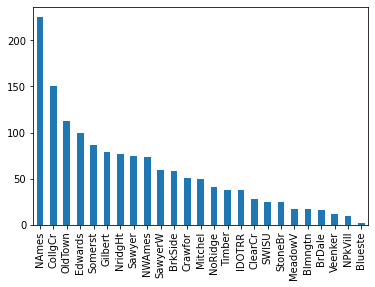

In [111]:
data['Neighborhood'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
p

<AxesSubplot:>

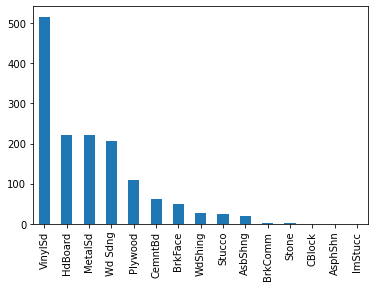

In [112]:
data['Exterior1st'].value_counts().sort_values(ascending=False).plot(kind = 'bar')

<AxesSubplot:>

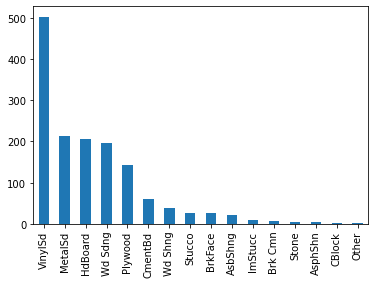

In [114]:
data['Exterior2nd'].value_counts().sort_values(ascending=False).plot(kind = 'bar')

In [115]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('SalePrice',axis = 1),data['SalePrice'],test_size = .3)

In [117]:
X_train['Neighborhood'].value_counts().sort_values(ascending=False).head(10)

NAmes      153
CollgCr    105
OldTown     82
Edwards     72
NridgHt     58
Somerst     58
NWAmes      51
Gilbert     51
Sawyer      50
SawyerW     40
Name: Neighborhood, dtype: int64

In [118]:
top_10 = X_train['Neighborhood'].value_counts().sort_values(ascending=False).head(10).index
top_10

Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'NridgHt', 'Somerst',
       'NWAmes', 'Gilbert', 'Sawyer', 'SawyerW'],
      dtype='object')

In [119]:
for label in top_10:
    X_train['Neighborhood'+'_'+label] = np.where(X_train['Neighborhood'] == label,1,0)
    X_test['Neighborhood'+'_'+label] = np.where(X_test['Neighborhood'] == label,1,0)
X_train

,Neighborhood,Exterior1st,Exterior2nd,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_Gilbert,Neighborhood_Sawyer,Neighborhood_SawyerW
1436,NAmes,HdBoard,HdBoard,1,0,0,0,0,0,0,0,0,0
119,CollgCr,VinylSd,VinylSd,0,1,0,0,0,0,0,0,0,0
139,CollgCr,VinylSd,VinylSd,0,1,0,0,0,0,0,0,0,0
444,CollgCr,VinylSd,VinylSd,0,1,0,0,0,0,0,0,0,0
560,Sawyer,Wd Sdng,Wd Sdng,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,SawyerW,Wd Sdng,Wd Sdng,0,0,0,0,0,0,0,0,0,1
1115,NridgHt,VinylSd,VinylSd,0,0,0,0,1,0,0,0,0,0
1022,OldTown,Wd Sdng,Wd Sdng,0,0,1,0,0,0,0,0,0,0
711,IDOTRR,MetalSd,MetalSd,0,0,0,0,0,0,0,0,0,0


In [121]:
def calculate_top_categories(df, variable, how_many=10):
    return [x for x in df[variable].value_counts().sort_values(ascending=False).head(how_many).index]
def one_hot_encode(train, test, variable, top_x_labels):

    for label in top_x_labels:
        train[variable + '_' + label] = np.where(
            train[variable] == label, 1, 0)
        
        test[variable + '_' + label] = np.where(
            test[variable] == label,1, 0)

In [122]:
variables = ['Exterior1st','Exterior2nd']
for variable in variables:
    labels = calculate_top_categories(X_train,variable,10)
    one_hot_encode(X_train,X_test,variable,labels)

In [124]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_NWAmes,...,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Exterior2nd_Stucco,Exterior2nd_BrkFace,Exterior2nd_AsbShng
1436,NAmes,HdBoard,HdBoard,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
119,CollgCr,VinylSd,VinylSd,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
139,CollgCr,VinylSd,VinylSd,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
444,CollgCr,VinylSd,VinylSd,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
560,Sawyer,Wd Sdng,Wd Sdng,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Mã hóa số nguyên

In [131]:
# load tập dữ liệu

data = pd.read_csv(
    './dataset/houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [135]:
ordinal_mapping = {
    k: i
    for i, k in enumerate(X_train['Neighborhood'].unique(), 0)
}

ordinal_mapping

{'CollgCr': 0,
 'ClearCr': 1,
 'BrkSide': 2,
 'Edwards': 3,
 'SWISU': 4,
 'Sawyer': 5,
 'Crawfor': 6,
 'NAmes': 7,
 'Mitchel': 8,
 'Timber': 9,
 'Gilbert': 10,
 'Somerst': 11,
 'MeadowV': 12,
 'OldTown': 13,
 'BrDale': 14,
 'NWAmes': 15,
 'NridgHt': 16,
 'SawyerW': 17,
 'NoRidge': 18,
 'IDOTRR': 19,
 'NPkVill': 20,
 'StoneBr': 21,
 'Blmngtn': 22,
 'Veenker': 23,
 'Blueste': 24}

In [136]:
data['Neighborhood'] = data['Neighborhood'].map(ordinal_mapping)

In [137]:
data

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,0,VinylSd,VinylSd,208500
1,23,MetalSd,MetalSd,181500
2,0,VinylSd,VinylSd,223500
3,6,Wd Sdng,Wd Shng,140000
4,18,VinylSd,VinylSd,250000
...,...,...,...,...
1455,10,VinylSd,VinylSd,175000
1456,15,Plywood,Plywood,210000
1457,6,CemntBd,CmentBd,266500
1458,7,MetalSd,MetalSd,142125


### Mã hóa tần số

In [144]:
# load tập dữ liệu

data = pd.read_csv(
    './dataset/houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [145]:
dict_Nei = Counter(X_train['Neighborhood'])

In [146]:
data['Neighborhood'] = data['Neighborhood'].map(dict_Nei)
data

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,105,VinylSd,VinylSd,208500
1,6,MetalSd,MetalSd,181500
2,105,VinylSd,VinylSd,223500
3,35,Wd Sdng,Wd Shng,140000
4,30,VinylSd,VinylSd,250000
...,...,...,...,...
1455,55,VinylSd,VinylSd,175000
1456,51,Plywood,Plywood,210000
1457,35,CemntBd,CmentBd,266500
1458,151,MetalSd,MetalSd,142125


In [149]:
frequency_map = data['Exterior1st'].value_counts() / data['Exterior1st'].value_counts().sum()
frequency_map

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
CBlock     0.000685
AsphShn    0.000685
ImStucc    0.000685
Name: Exterior1st, dtype: float64

In [150]:
data['Exterior1st'] = data['Exterior1st'].map(frequency_map)

In [151]:
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,105,0.352740,VinylSd,208500
1,6,0.150685,MetalSd,181500
2,105,0.352740,VinylSd,223500
3,35,0.141096,Wd Shng,140000
4,30,0.352740,VinylSd,250000


### Mã hóa mục tiêu

In [152]:
# load tập dữ liệu

data = pd.read_csv(
    './dataset/houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


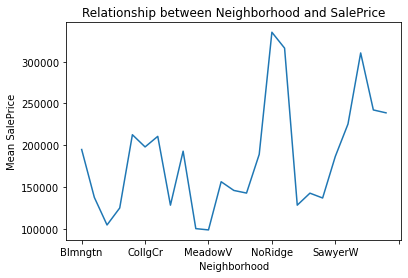

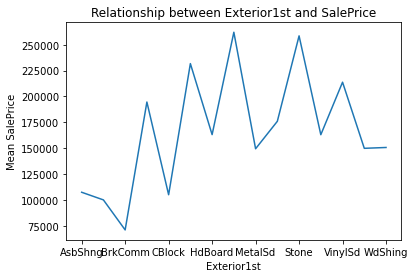

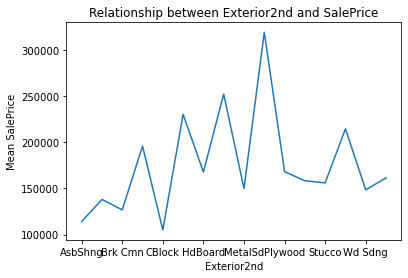

In [155]:
# khám phá mối quan hệ của các hạng mục với mục tiêu

for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    
    fig = plt.figure()
    fig = data.groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Relationship between {} and SalePrice'.format(var))
    fig.set_ylabel('Mean SalePrice')
    plt.show()

In [157]:
data.groupby(['Neighborhood'])['SalePrice'].mean().sort_values(ascending = False)

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64

In [159]:
ordered_labels = data.groupby(['Neighborhood'])['SalePrice'].mean().sort_values().index
ordered_labels

Index(['MeadowV', 'IDOTRR', 'BrDale', 'BrkSide', 'Edwards', 'OldTown',
       'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW',
       'NWAmes', 'Gilbert', 'Blmngtn', 'CollgCr', 'Crawfor', 'ClearCr',
       'Somerst', 'Veenker', 'Timber', 'StoneBr', 'NridgHt', 'NoRidge'],
      dtype='object', name='Neighborhood')

In [160]:
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'MeadowV': 0,
 'IDOTRR': 1,
 'BrDale': 2,
 'BrkSide': 3,
 'Edwards': 4,
 'OldTown': 5,
 'Sawyer': 6,
 'Blueste': 7,
 'SWISU': 8,
 'NPkVill': 9,
 'NAmes': 10,
 'Mitchel': 11,
 'SawyerW': 12,
 'NWAmes': 13,
 'Gilbert': 14,
 'Blmngtn': 15,
 'CollgCr': 16,
 'Crawfor': 17,
 'ClearCr': 18,
 'Somerst': 19,
 'Veenker': 20,
 'Timber': 21,
 'StoneBr': 22,
 'NridgHt': 23,
 'NoRidge': 24}

In [161]:
data['Neighborhood'] = data['Neighborhood'].map(ordinal_mapping)

In [162]:
data

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,16,VinylSd,VinylSd,208500
1,20,MetalSd,MetalSd,181500
2,16,VinylSd,VinylSd,223500
3,17,Wd Sdng,Wd Shng,140000
4,24,VinylSd,VinylSd,250000
...,...,...,...,...
1455,14,VinylSd,VinylSd,175000
1456,13,Plywood,Plywood,210000
1457,17,CemntBd,CmentBd,266500
1458,10,MetalSd,MetalSd,142125


## Outlier

### Trimming data
- Cắt tỉa các outlier nó không hiệu quá và ít được sử dụng trong ML
- Sau khi cắt tỉa nó sẽ tính toán lại mean,median nên nó sẽ tạo các outlier mới

In [175]:
from sklearn.datasets import load_boston
import seaborn as sns
import scipy.stats as stats

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [176]:
# hàm tạo biểu đồ tần suất, biểu đồ Q-Q và
# biểu đồ hộp đã học trước đó


def diagnostic_plots(df, variable):
    # hàm nhận dataframe (df) và
    # biến cần quan tâm làm đối số

    # xác định kích thước figure
    plt.figure(figsize=(16, 4))

    # biểu đồ tần suất
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # biểu đồ Q-Q 
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # biểu đồ hộp
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

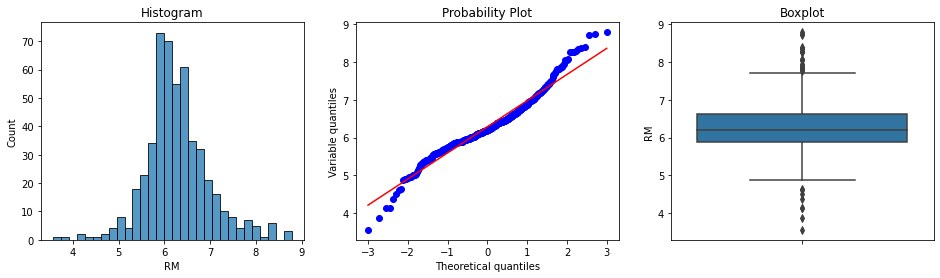

In [177]:
diagnostic_plots(boston,'RM')

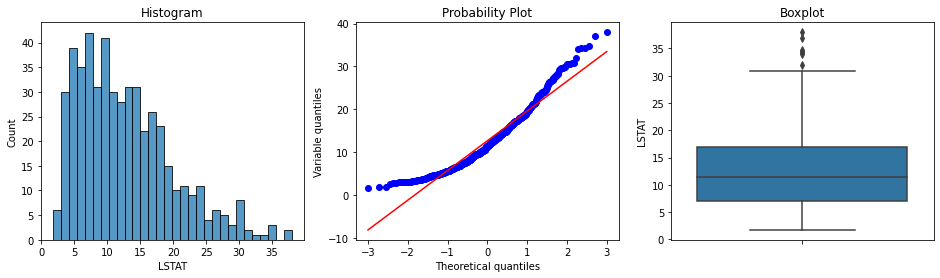

In [178]:
diagnostic_plots(boston,'LSTAT')

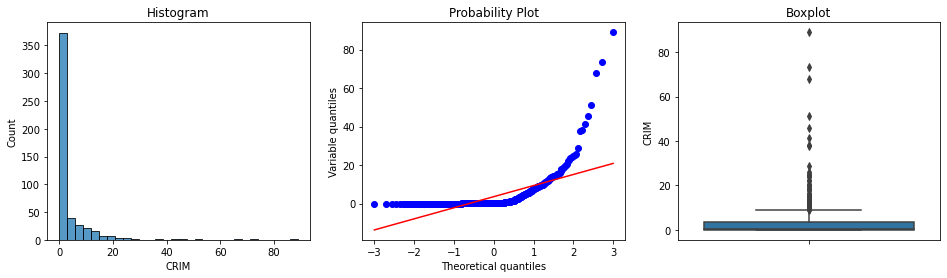

In [179]:
diagnostic_plots(boston,'CRIM')

In [191]:
def find_skewed_boundaries(data,variable,value):
    Q3 = data[variable].quantile(.75)
    Q1 = data[variable].quantile(.25)
    IQR = Q3-Q1
    upper = Q3 + IQR*value
    lower = Q1 - IQR*value
    return upper,lower

In [193]:
upper_rm,lower_rm = find_skewed_boundaries(boston,'RM',1.5)
upper_rm,lower_rm

(7.730499999999999, 4.778500000000001)

In [194]:
upper_lstat,lower_lstat = find_skewed_boundaries(boston,'LSTAT',1.5)
upper_lstat,lower_lstat

(31.962500000000006, -8.057500000000005)

In [195]:
upper_crim,lower_crim = find_skewed_boundaries(boston,'CRIM',1.5)
upper_crim,lower_crim

(9.06963875, -5.31051125)

In [202]:
outliers_RM = np.where(boston['RM'] > upper_rm, True,
                       np.where(boston['RM'] < lower_rm, True, False))
outliers_CRIM = np.where(boston['CRIM'] > upper_crim, True,
                       np.where(boston['CRIM'] < lower_crim, True, False))
outliers_LSTAT = np.where(boston['LSTAT'] > upper_lstat, True,
                       np.where(boston['LSTAT'] < lower_lstat, True, False))

In [208]:
boston_trimming = boston.loc[~(outliers_CRIM+outliers_LSTAT+outliers_RM)]

In [211]:
boston_trimming.shape,boston.shape

((416, 3), (506, 3))

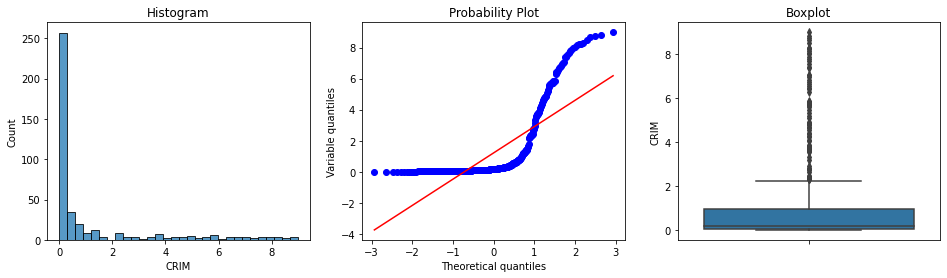

In [212]:
diagnostic_plots(boston_trimming,'CRIM')

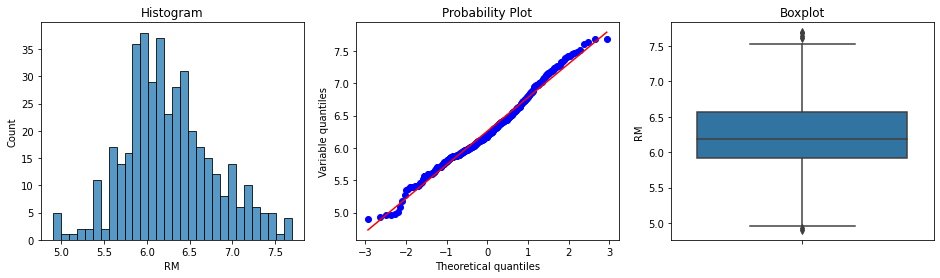

In [213]:
diagnostic_plots(boston_trimming,'RM')

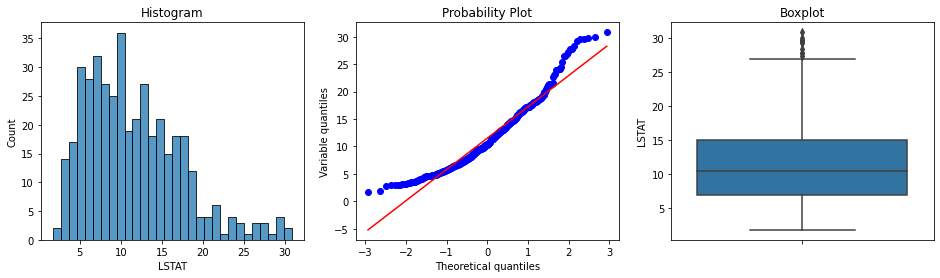

In [214]:
diagnostic_plots(boston_trimming,'LSTAT')

### Censoring/Capping

In [215]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


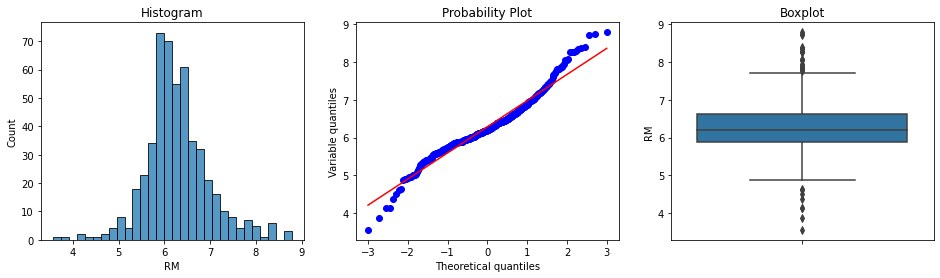

In [216]:
diagnostic_plots(boston,'RM')

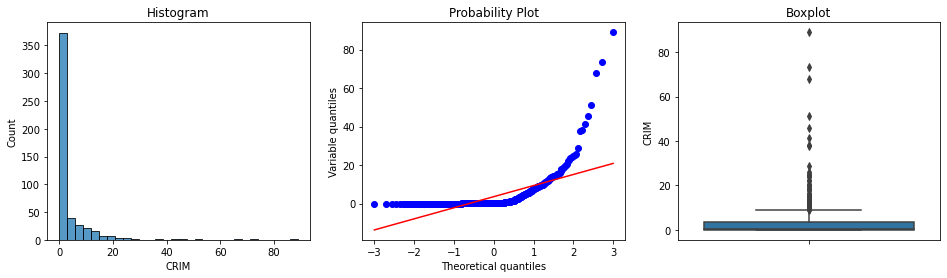

In [217]:
diagnostic_plots(boston,'CRIM')

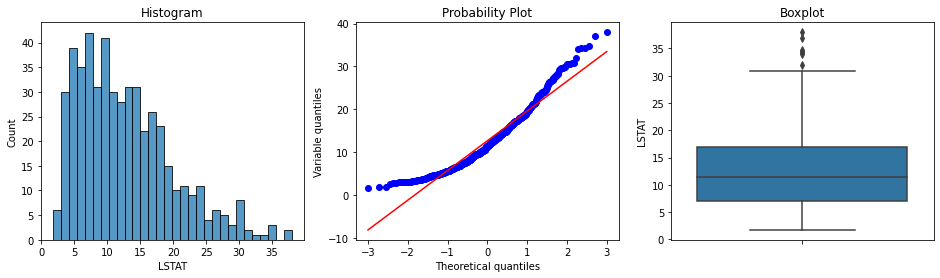

In [218]:
diagnostic_plots(boston,'LSTAT')

In [219]:
def find_skewed_boundaries(data,variable,value):
    Q3 = data[variable].quantile(.75)
    Q1 = data[variable].quantile(.25)
    IQR = Q3-Q1
    upper = Q3 + IQR*value
    lower = Q1 - IQR*value
    return upper,lower

In [220]:
upper_rm,lower_rm = find_skewed_boundaries(boston,'RM',1.5)
upper_lstat,lower_lstat = find_skewed_boundaries(boston,'LSTAT',1.5)
upper_crim,lower_crim = find_skewed_boundaries(boston,'CRIM',1.5)

In [223]:
#Gioi han min-max
boston['RM'] = np.where(boston['RM'] > upper_rm,upper_rm,np.where(boston['RM'] < lower_rm,lower_rm,boston['RM']))

In [224]:
boston['LSTAT'] = np.where(boston['LSTAT'] > upper_lstat,upper_lstat,np.where(boston['LSTAT'] < lower_lstat,lower_lstat,boston['LSTAT']))
boston['CRIM'] = np.where(boston['CRIM'] > upper_crim,upper_crim,np.where(boston['CRIM'] < lower_crim,lower_crim,boston['CRIM']))

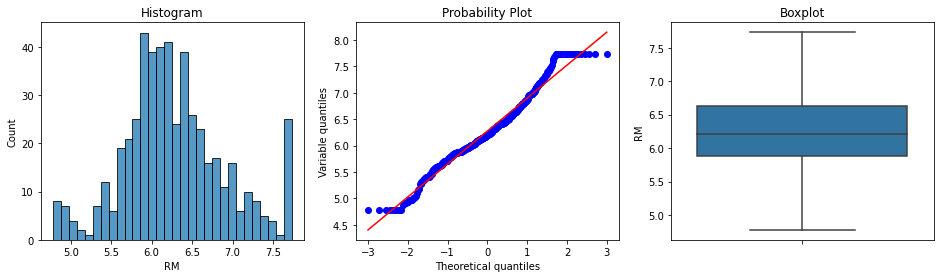

In [226]:
diagnostic_plots(boston, 'RM')

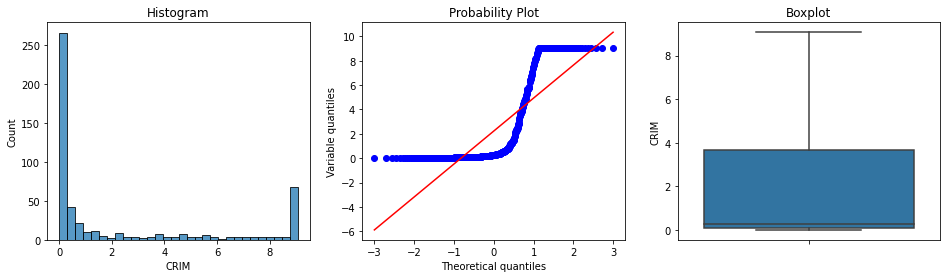

In [227]:
diagnostic_plots(boston, 'CRIM')

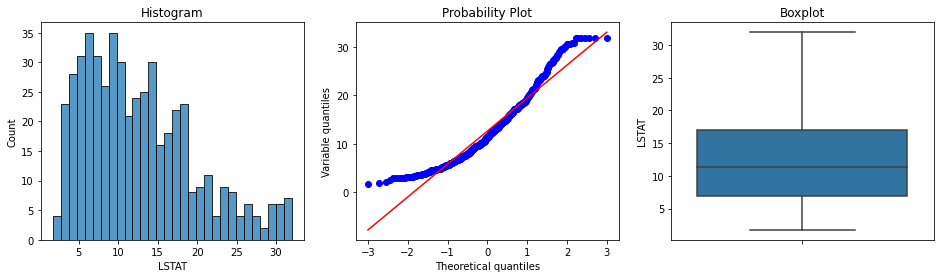

In [228]:
diagnostic_plots(boston, 'LSTAT')

## Scale data

In [229]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler,Normalizer

In [244]:
# load dữ liệu giá nhà ở Boston

# cách chúng ta load tập dữ liệu boston từ sklearn
boston_dataset = load_boston()

# tạo một dataframe với các biến độc lập
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# thêm target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [245]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

#### StandardScaler
- Chuẩn hóa dữ liệu:
    - mean = 0 , độ lệch chuẩn 1
    - Duy trình hình dạng ban đầu
    - Duy trì outlier

In [246]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [247]:
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [248]:
scale.mean_

array([3.35828432e+00, 1.18093220e+01, 1.10787571e+01, 6.49717514e-02,
       5.56098305e-01, 6.30842655e+00, 6.89940678e+01, 3.76245876e+00,
       9.35310734e+00, 4.01782486e+02, 1.84734463e+01, 3.60601186e+02,
       1.24406497e+01])

In [249]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [251]:
np.round(X_train.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,3.4,11.8,11.1,0.1,0.6,6.3,69.0,3.8,9.4,401.8,18.5,360.6,12.4
std,8.4,23.7,7.0,0.2,0.1,0.7,28.0,2.1,8.7,170.6,2.2,85.6,7.1
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.2,1.0,187.0,12.6,0.3,1.7
25%,0.1,0.0,5.0,0.0,0.4,5.9,45.2,2.1,4.0,276.0,17.4,376.1,6.7
50%,0.3,0.0,8.6,0.0,0.5,6.2,79.4,3.2,5.0,311.0,19.1,391.6,11.2
75%,3.1,20.0,18.1,0.0,0.6,6.6,93.8,5.1,24.0,666.0,20.2,395.7,16.7
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,37.0


In [252]:
np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.4,-0.5,-1.5,-0.3,-1.5,-3.9,-2.4,-1.3,-1.0,-1.3,-2.6,-4.2,-1.5
25%,-0.4,-0.5,-0.9,-0.3,-0.9,-0.6,-0.9,-0.8,-0.6,-0.7,-0.5,0.2,-0.8
50%,-0.4,-0.5,-0.4,-0.3,-0.2,-0.1,0.4,-0.3,-0.5,-0.5,0.3,0.4,-0.2
75%,-0.0,0.3,1.0,-0.3,0.6,0.5,0.9,0.6,1.7,1.6,0.8,0.4,0.6
max,10.3,3.7,2.4,3.8,2.7,3.5,1.1,4.1,1.7,1.8,1.6,0.4,3.5


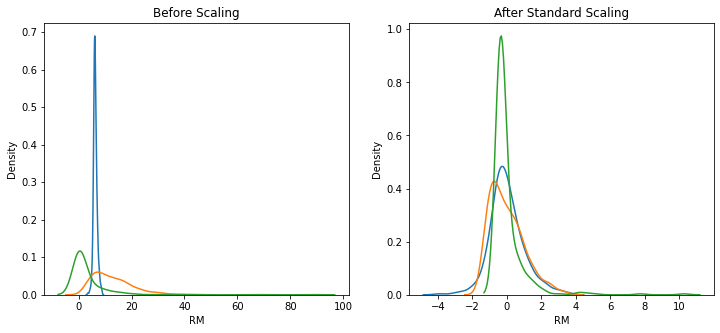

In [253]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

#### Chuẩn hóa giá trị trung bình
- Chuẩn hóa dữ liệu
    - Tập trung mean 0
    - Min và Max nằm khoảng -1 đến 1
    - Hình dạng có thể thay đổi
    - Phương sai thay đổi

In [261]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

In [262]:
#Sử dụng pandas
means = X_train.mean()
maxx = X_train.max()
minn = X_train.min()
ranges = maxx - minn

In [263]:
X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

In [264]:
np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,-0.0,-0.1,-0.4,-0.1,-0.4,-0.5,-0.7,-0.2,-0.4,-0.4,-0.6,-0.9,-0.3
25%,-0.0,-0.1,-0.2,-0.1,-0.2,-0.1,-0.2,-0.2,-0.2,-0.2,-0.1,0.0,-0.2
50%,-0.0,-0.1,-0.1,-0.1,-0.0,-0.0,0.1,-0.0,-0.2,-0.2,0.1,0.1,-0.0
75%,-0.0,0.1,0.3,-0.1,0.2,0.1,0.3,0.1,0.6,0.5,0.2,0.1,0.1
max,1.0,0.9,0.6,0.9,0.6,0.5,0.3,0.8,0.6,0.6,0.4,0.1,0.7


<AxesSubplot:ylabel='Density'>

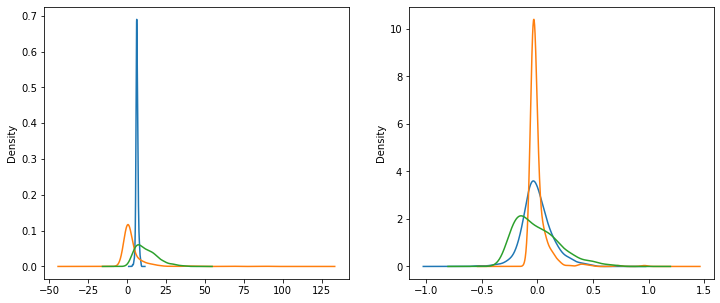

In [266]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
X_train['RM'].plot(kind = 'kde',ax = ax1)
X_train['CRIM'].plot(kind = 'kde',ax = ax1)
X_train['LSTAT'].plot(kind = 'kde',ax = ax1)

X_train_scaled['RM'].plot(kind = 'kde',ax = ax2)
X_train_scaled['CRIM'].plot(kind = 'kde',ax = ax2)
X_train_scaled['LSTAT'].plot(kind = 'kde',ax = ax2)

#### Co dãn min-max
- Chuẩn hóa dữ liệu
    - Dữ liệu sẽ nằm trong khoảng từ 0 đến 1
    - Hinh dạng ban đầu sẽ thay đổi
    - Phương sai thay đổi
    - nhạy với outlier

In [267]:
scale = MinMaxScaler()
scale.fit(X_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

In [270]:
X_train_scale = pd.DataFrame(X_train_scale,columns=X_train.columns)
X_test_scale = pd.DataFrame(X_test_scale,columns=X_test.columns)

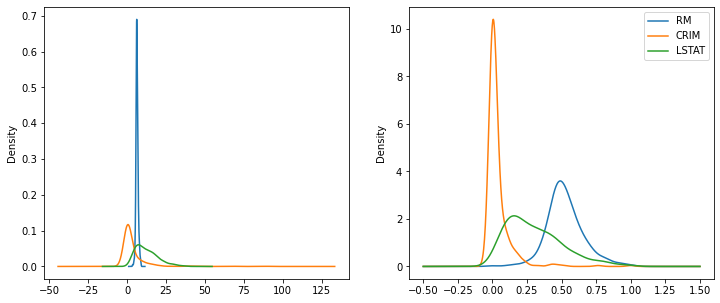

In [274]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
X_train['RM'].plot(kind = 'kde',ax = ax1)
X_train['CRIM'].plot(kind = 'kde',ax = ax1)
X_train['LSTAT'].plot(kind = 'kde',ax = ax1)

X_train_scale['RM'].plot(kind = 'kde',ax = ax2)
X_train_scale['CRIM'].plot(kind = 'kde',ax = ax2)
X_train_scale['LSTAT'].plot(kind = 'kde',ax = ax2)
plt.legend()

In [275]:
np.round(X_train_scale.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.1,0.4,0.1,0.4,0.5,0.7,0.2,0.4,0.4,0.6,0.9,0.3
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.2,0.0,0.1,0.4,0.4,0.1,0.1,0.2,0.5,0.9,0.1
50%,0.0,0.0,0.3,0.0,0.3,0.5,0.8,0.2,0.2,0.2,0.7,1.0,0.3
75%,0.0,0.2,0.6,0.0,0.5,0.6,0.9,0.4,1.0,0.9,0.8,1.0,0.4
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Co dãn giá trị tuyệt đối
- Chuẩn hóa dữ liệu
    - Không căn giữa ở 0 (nhưng có thể với một phương pháp khác)
    - phương sai thay đổi trên các biến
    - không giữ hình dạng của phân phối ban đầu
    - nhạy với outlier

In [276]:
scaler = MaxAbsScaler()

# khớp scaler với tập huấn luyện, nó sẽ học các tham số
scaler.fit(X_train)

# biến đổi tập huấn luyện và tập kiểm tra
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [277]:
# biến đổi các mảng NumPy đã trả về vào các dataframe cho phần còn lại của
# bản mô phỏng

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [278]:
# hãy xem tập dữ liệu huấn luyện đã co giãn: các giá trị tối đa
# sử dụng np.round để giảm số lượng số thập phân xuống còn 1

np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.1,0.4,0.1,0.6,0.7,0.7,0.3,0.4,0.6,0.8,0.9,0.3
std,0.1,0.2,0.3,0.2,0.1,0.1,0.3,0.2,0.4,0.2,0.1,0.2,0.2
min,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.1,0.0,0.3,0.6,0.0,0.0
25%,0.0,0.0,0.2,0.0,0.5,0.7,0.5,0.2,0.2,0.4,0.8,0.9,0.2
50%,0.0,0.0,0.3,0.0,0.6,0.7,0.8,0.3,0.2,0.4,0.9,1.0,0.3
75%,0.0,0.2,0.7,0.0,0.7,0.8,0.9,0.4,1.0,0.9,0.9,1.0,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


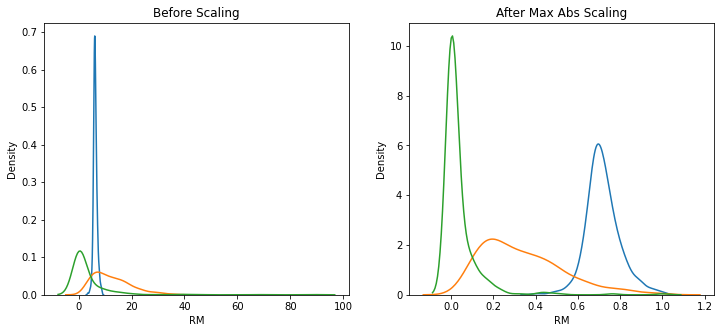

In [279]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()